# Projeto-4

### Imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime


### Leitura do arquivo e tratamento dos dados

In [2]:
df_gas = pd.read_csv('2004-2021.tsv', sep='\t', parse_dates=True)
df_gas.info()
#teste

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [6]:
df_gas = pd.read_csv('2004-2021.tsv', sep='\t', parse_dates=['DATA INICIAL', 'DATA FINAL'])
df_gas['ANO'] = df_gas['DATA FINAL'].dt.year
df_gas['MÊS'] = df_gas['DATA FINAL'].dt.month
df_gas.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ANO,MÊS
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,2004,5
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,2004,5
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,2004,5
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,2004,5
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,2004,5


In [ ]:
df_gas['PRODUTO'] = df_gas['PRODUTO'].apply(lambda x: 'ÓLEO DIESEL' if (x =='OLEO DIESEL') else x)
df_gas['PRODUTO'] = df_gas['PRODUTO'].apply(lambda x: 'ÓLEO DIESEL S10' if (x =='OLEO DIESEL S10') else x)


In [10]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   120823 non-null  datetime64[ns]
 1   DATA FINAL                     120823 non-null  datetime64[ns]
 2   REGIÃO                         120823 non-null  object        
 3   ESTADO                         120823 non-null  object        
 4   PRODUTO                        120823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 6   UNIDADE DE MEDIDA              120823 non-null  object        
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64       
 11  

In [5]:
# Adcionando a coluna para mês e ano

# df_gas['DATA INICIAL'] = pd.to_datetime(df_gas['DATA INICIAL'], format='%Y-%m-%d')
# df_gas['DATA FINAL'] = pd.to_datetime(df_gas['DATA INICIAL'], format='%Y-%m-%d')
# df_gas['ANO'] = pd.DatetimeIndex(df_gas['DATA INICIAL']).year
# df_gas['MÊS'] = pd.DatetimeIndex(df_gas['DATA INICIAL']).month


### Objetivos!!

- Plotar gráfico com a taxa de aumento de cada combustivel em todo período.
- Plotar um gráfico com o crescimento da média do PREÇO MÉDIO REVENDA ano a ano por Região.
- Ver qual o estado que mais/menos aumentou o valor médio do PREÇO MÉDIO REVENDA ano a ano por Região e plotar um gráfico comparando os dois.
- Comparar a média do PREÇO MÉDIO REVENDA com o PREÇO MÉDIO DISTRIBUIÇÃO desses dois estados.
- Plotar um gráfico com a média da quantidade de postos por estado em 2004 x a quantidade média de postos por estado em 2021.
- Ver a correlação da quantidade de postos disponiveis avaliados com PREÇO MÉDIO REVENDA entre todos os estados.
- Mapa de calor com valor médio de cada estado.
- Mapa de calor com quantidade de postos por estado.

- Observações:
- Há valores com -9999, devemos substituir por NaN?
- Gasolina Aditivada só temos valores entre 20-21, base de dados muito pequena em relação aos outros!

### - Plotar gráfico com a taxa de aumento de cada combustivel em todo período.

In [35]:
df_gas['REGIÃO'].unique()

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

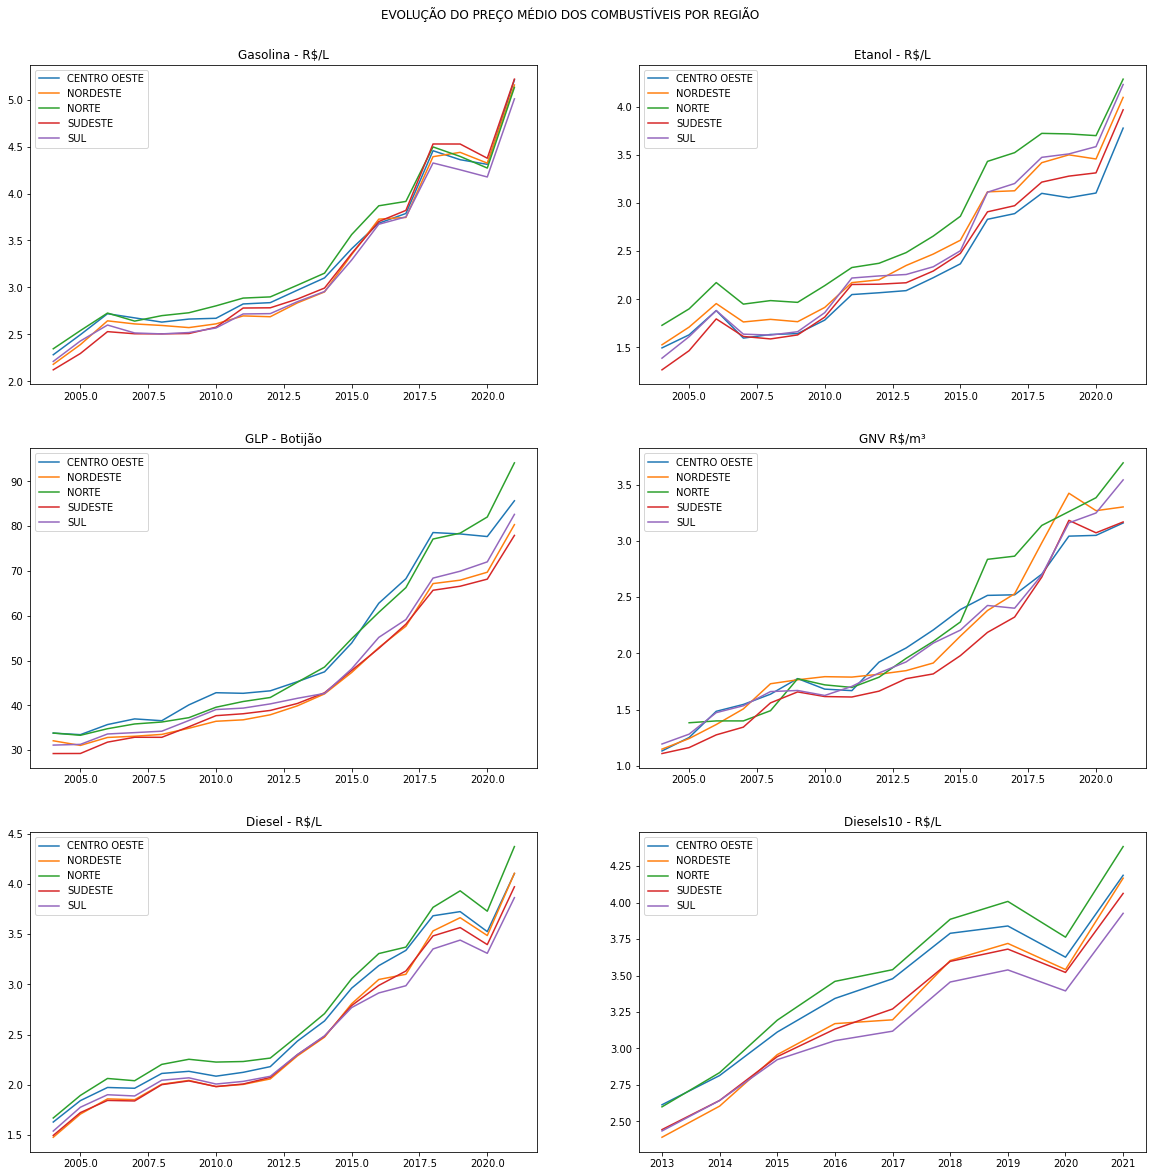

In [48]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
fig.suptitle('EVOLUÇÃO DO PREÇO MÉDIO DOS COMBUSTÍVEIS POR REGIÃO', fontsize=12, y=0.92)

df_gasolina = df_gas[df_gas['PRODUTO']=='GASOLINA COMUM'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_etanol = df_gas[df_gas['PRODUTO']=='ETANOL HIDRATADO'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_glp = df_gas[df_gas['PRODUTO']=='GLP'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_gnv = df_gas[df_gas['PRODUTO']=='GNV'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_diesel = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_diesels10 = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL S10'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')

axs[0,0].plot(df_gasolina)
axs[0,1].plot(df_etanol)
axs[1,0].plot(df_glp)
axs[1,1].plot(df_gnv)
axs[2,0].plot(df_diesel)
axs[2,1].plot(df_diesels10)

axs[0,0].set_title('Gasolina - R$/L')
axs[0,1].set_title('Etanol - R$/L')
axs[1,0].set_title('GLP - Botijão')
axs[1,1].set_title('GNV R$/m³')
axs[2,0].set_title('Diesel - R$/L')
axs[2,1].set_title('Diesels10 - R$/L')

axs[0,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[0,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[1,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[1,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[2,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[2,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left');

- Comentários:

- O Norte tem majoritariamente o maior preço dos diesels(comum e 10s) e do etanol e também do GNV a partir de 2015, do GLP a partir de 2018 e da gasolina entre 2008 e 2017. Com certeza é pior região em relação a preço.
- 